In [5]:
import torch
from hydra.utils import instantiate
from hydra import initialize, compose
import hydra
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import torch.nn.functional as F
import h5py, numpy as np

from PhaseClassifier import logging
logger = logging.getLogger(__name__)

import wandb
from omegaconf import OmegaConf

from PhaseClassifier.scripts.run import setup_model, load_model_instance

from utils.tools import observable_from_sim, plot_susc, plot_magnetization, generate_data_to_plot

In [2]:
hydra.core.global_hydra.GlobalHydra.instance().clear()
initialize(version_base=None, config_path="PhaseClassifier/config")
config=compose(config_name="config.yaml")
wandb.init(tags = [config.data.dataset_name], project=config.wandb.project, entity=config.wandb.entity, config=OmegaConf.to_container(config, resolve=True), mode='disabled')

In [3]:
# self = setup_model(config)
new_model = False
if new_model:
    self = setup_model(config)
    self.model = self.model.double()  # sets all model parameters to float64
else:
    self = load_model_instance(config, True)
    self.model = self.model.double()

[01:51:40.020] INFO   data.dataManager                                  Loading dataset: Ising
[01:51:40.021] INFO   data.dataManager                                  Keys: ['Label', 'Magnetization', 'Snapshot', 'Susceptibility', 'Temperature']
[01:51:40.210] INFO   data.dataManager                                  dict_keys(['Label', 'Magnetization', 'Snapshot', 'Susceptibility', 'Temperature'])
[01:51:40.211] INFO   data.dataManager                                  Creating dataloader. Total number of samples: 67311
[01:51:40.285] INFO   data.dataManager                                  <torch.utils.data.dataloader.DataLoader object at 0x7f715350cec0>: 53848 events, 108 batches
[01:51:40.285] INFO   data.dataManager                                  <torch.utils.data.dataloader.DataLoader object at 0x7f71534b7110>: 6733 events, 7 batches
[01:51:40.286] INFO   data.dataManager                                  <torch.utils.data.dataloader.DataLoader object at 0x7f71534b6fd0>: 6730 event

cuda:2


[01:51:41.321] INFO   utils.tools                                       Keys: ['Label', 'Magnetization', 'Snapshot', 'Susceptibility', 'Temperature']
[01:51:41.569] INFO   data.dataManager                                  Loading dataset: Ising
[01:51:41.570] INFO   data.dataManager                                  Keys: ['Label', 'Magnetization', 'Snapshot', 'Susceptibility', 'Temperature']
[01:51:41.748] INFO   data.dataManager                                  dict_keys(['Label', 'Magnetization', 'Snapshot', 'Susceptibility', 'Temperature'])
[01:51:41.748] INFO   data.dataManager                                  Creating dataloader. Total number of samples: 67311
[01:51:41.830] INFO   data.dataManager                                  <torch.utils.data.dataloader.DataLoader object at 0x7f7153453a80>: 53848 events, 108 batches
[01:51:41.831] INFO   data.dataManager                                  <torch.utils.data.dataloader.DataLoader object at 0x7f7152221910>: 6733 events, 7 batches

Loading weights for module =  seq
Loading weights for module =  lm_head1
Loading weights for module =  sa_head
Loading weights for module =  lm_head2
Loading weights for module =  conv


In [4]:
self.eval_model(self.data_mgr.val_loader, 0)

[01:52:12.972] INFO   engine.engine                                     Epoch: 0 	 Batch Loss: 9.405121121
/home/javier/Projects/PhaseClassifier/utils/tools.py:69: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  pred_list.append(F.softmax(pred)[:,1].cpu())


In [6]:
mag = generate_data_to_plot(self)
fig1 = plot_magnetization(mag, self.temp, self.mag_sim)
fig2 = plot_susc(mag, self.temp, self.susc_sim)

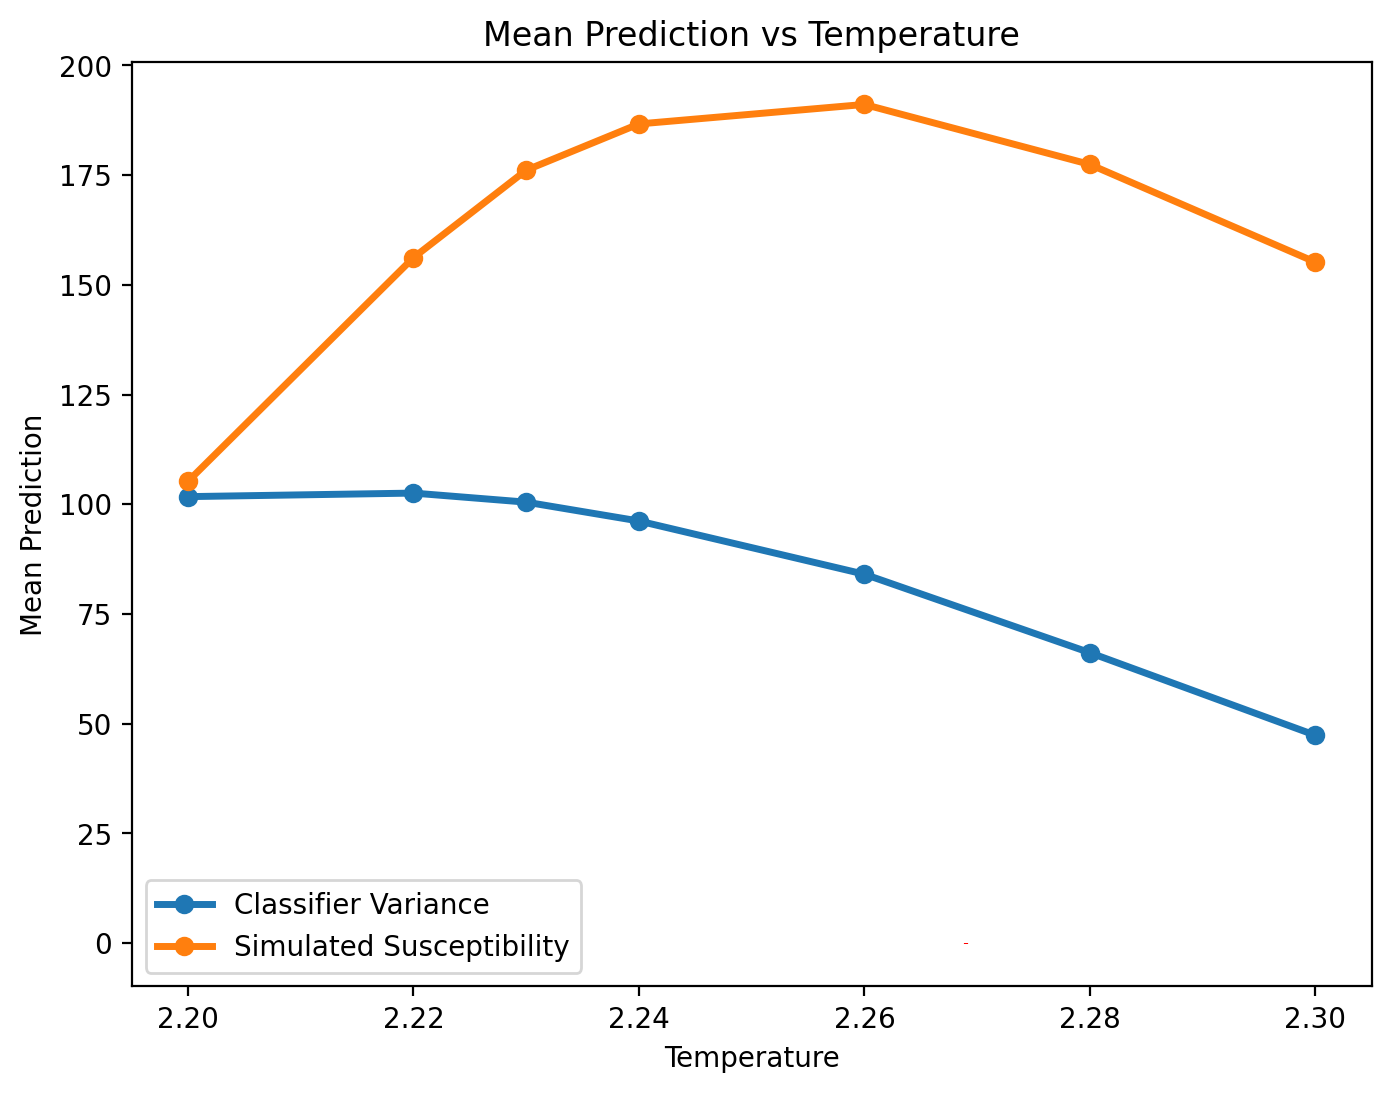

In [8]:
fig2